In [1]:
#import required libraries
import cv2
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
img_arr = cv2.imread("Test_Dataset/closed_eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

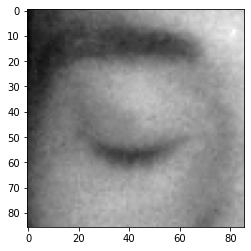

In [3]:
plt.imshow(img_arr, cmap="gray")

In [4]:
img_arr.shape

(86, 86)

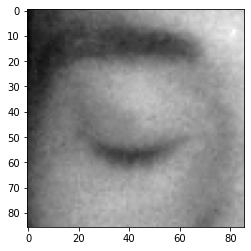

In [5]:
#traning dataset
Datadirectory = "Test_Dataset/"
Classes = ["closed_eyes", "open_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_arr, cmap="gray")
        plt.show()
        break
    break

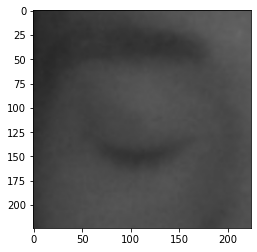

In [6]:
img_size = 224
new_arr = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_arr, cmap="gray")

In [7]:
#reading all the images 
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
                new_arr = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_arr,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

2000


In [10]:
random.shuffle(training_Data)

In [11]:
x = []
y = []
for features,lable in training_Data:
    x.append(features)
    y.append(lable)
x = np.array(x).reshape(-1,img_size, img_size, 3)    

In [12]:
x.shape

(2000, 224, 224, 3)

In [13]:
#normalize the data
x = x/255.0;

In [14]:
y = np.array(y)

In [15]:
pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

# Deep learning model for training

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer Learning

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-4].output

In [21]:
layer = layers.Flatten()(base_output)
final = layers.Dense(1)(layer)
final_output = layers.Activation('sigmoid')(final)

In [22]:
new_model = keras.Model(inputs = base_input, outputs = final)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Binary Classification

In [24]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
new_model.fit(x, y, epochs = 3, batch_size = 20)

Epoch 1/3
100/100 [==============================] - 181s 2s/step - loss: 6.7570 - accuracy: 0.5590
Epoch 2/3
100/100 [==============================] - 177s 2s/step - loss: 1.3088 - accuracy: 0.9095
Epoch 3/3
100/100 [==============================] - 175s 2s/step - loss: 2.2798 - accuracy: 0.8455


In [26]:
accuracy = new_model.evaluate(x ,y)


63/63 [==============================] - 36s 561ms/step - loss: 7.5717 - accuracy: 0.5060


In [27]:
print(accuracy)

[7.571719169616699, 0.5059999823570251]


In [29]:
new_model.save('my_driver.h5')

In [30]:
new_model = tf.keras.models.load_model('my_driver.h5')

In [31]:
img_arr = cv2.imread("Test_Dataset/open_eyes/s0001_02286_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
new_arr = cv2.resize(backtorgb, (img_size,img_size))

In [32]:
x_input = np.array(new_arr).reshape(1, img_size, img_size, 3)

In [33]:
x_input.shape

(1, 224, 224, 3)

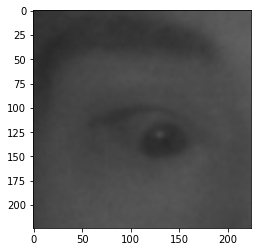

In [34]:
plt.imshow(new_arr)

In [35]:
x_input = x_input/255.0

In [36]:
prediction = new_model.predict(x_input)

In [37]:
prediction

array([[-26.652899]], dtype=float32)

In [38]:
img = cv2.imread('download.jfif')

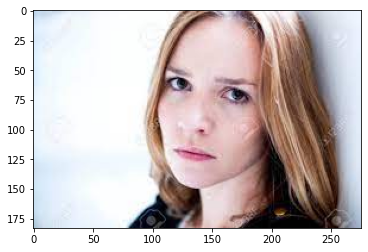

In [39]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [43]:
eye  = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [44]:
for(x, y, w, h) in eye:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

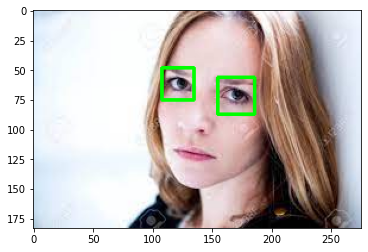

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [46]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eye  = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eye:
    ro_gray = gray[y:y+h, x:x+w]
    ro_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(ro_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else:
        for(ex, ey, ew, eh) in eyess:
            eyes_ro = ro_color[ey:ey+eh, ex:ex+ew]

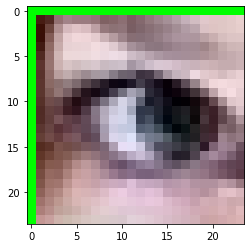

In [47]:
plt.imshow(cv2.cvtColor(eyes_ro, cv2.COLOR_BGR2RGB))

In [48]:
eyes_ro.shape

(24, 24, 3)

In [49]:
final_image = cv2.resize(eyes_ro, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [50]:
final_image.shape

(1, 224, 224, 3)

In [51]:
new_model.predict(final_image)

array([[-4.148742]], dtype=float32)

In [52]:
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eye  = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eye:
        ro_gray = gray[y:y+h, x:x+w]
        ro_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(ro_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for(ex, ey, ew, eh) in eyess:
                eyes_ro = ro_color[ey:ey+eh, ex:ex+ew]
            
    final_image = cv2.resize(eyes_ro, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if (predictions > 0):
        status = "Open eyes"
    else:
        status = "Closed eyes"
        
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
    print(faceCascade.empty()) 
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    cv2.putText(frame, status, (50,50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection', frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
        
cap.release()
cv2.destroyAllWindows()        

False
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
Eyes are not detected
False
False
False
False
Eyes are not detected
False
False
Eyes are not detec